In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf


# **Reading Data :**

In [2]:
data=pd.read_csv("../data/Student_Performance.csv")

# **EDA :** 

In [3]:
data.head()

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPracticed,PerformanceIndex
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   HoursStudied               10000 non-null  int64 
 1   PreviousScores             10000 non-null  int64 
 2   ExtracurricularActivities  10000 non-null  object
 3   SleepHours                 10000 non-null  int64 
 4   SampleQuestionPracticed    10000 non-null  int64 
 5   PerformanceIndex           10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,HoursStudied,PreviousScores,SleepHours,SampleQuestionPracticed,PerformanceIndex
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data.isna().sum()

HoursStudied                 0
PreviousScores               0
ExtracurricularActivities    0
SleepHours                   0
SampleQuestionPracticed      0
PerformanceIndex             0
dtype: int64

In [7]:
columns = [col for col in data.columns ]

for col in columns:
    print(data[col].value_counts(),"\n")

HoursStudied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64 

PreviousScores
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: count, dtype: int64 

ExtracurricularActivities
No     5052
Yes    4948
Name: count, dtype: int64 

SleepHours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: count, dtype: int64 

SampleQuestionPracticed
6    1059
9    1051
3    

In [8]:
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print(data[col].value_counts(),"\n")

ExtracurricularActivities
No     5052
Yes    4948
Name: count, dtype: int64 



# **EDA with visualization :**

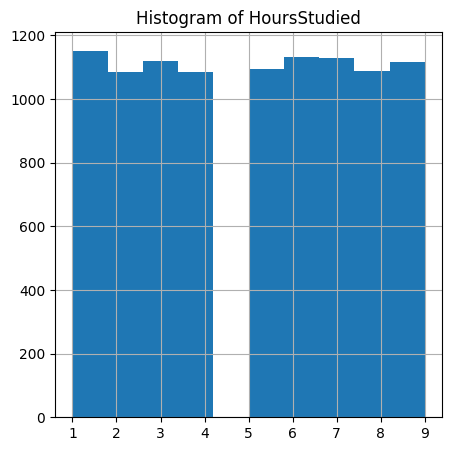

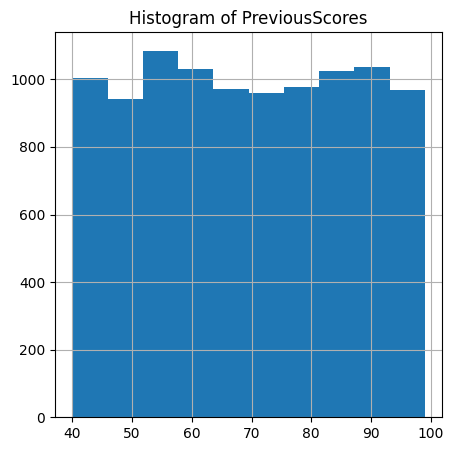

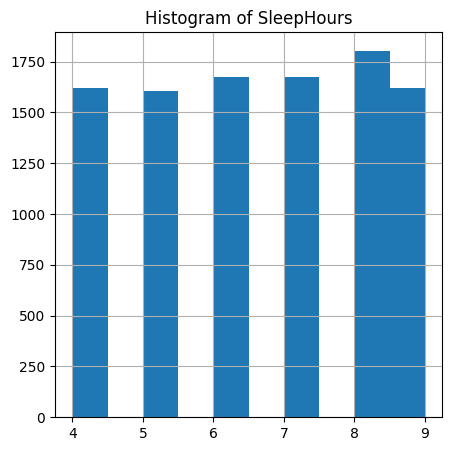

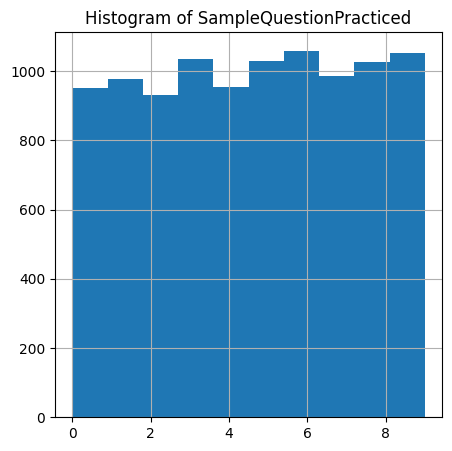

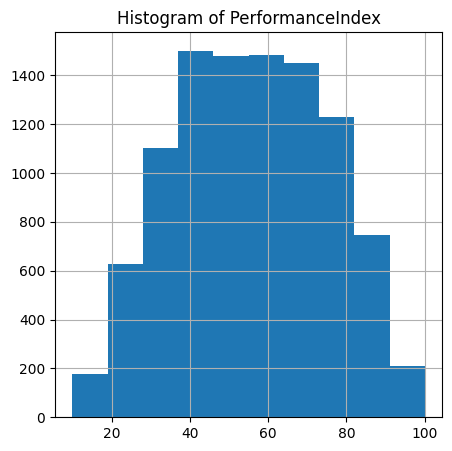

In [9]:
# use matplotlib to plot the histogram of the data
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Histogram of {col}')
    data[col].hist()
    plt.show()
    plt.close(fig)
    

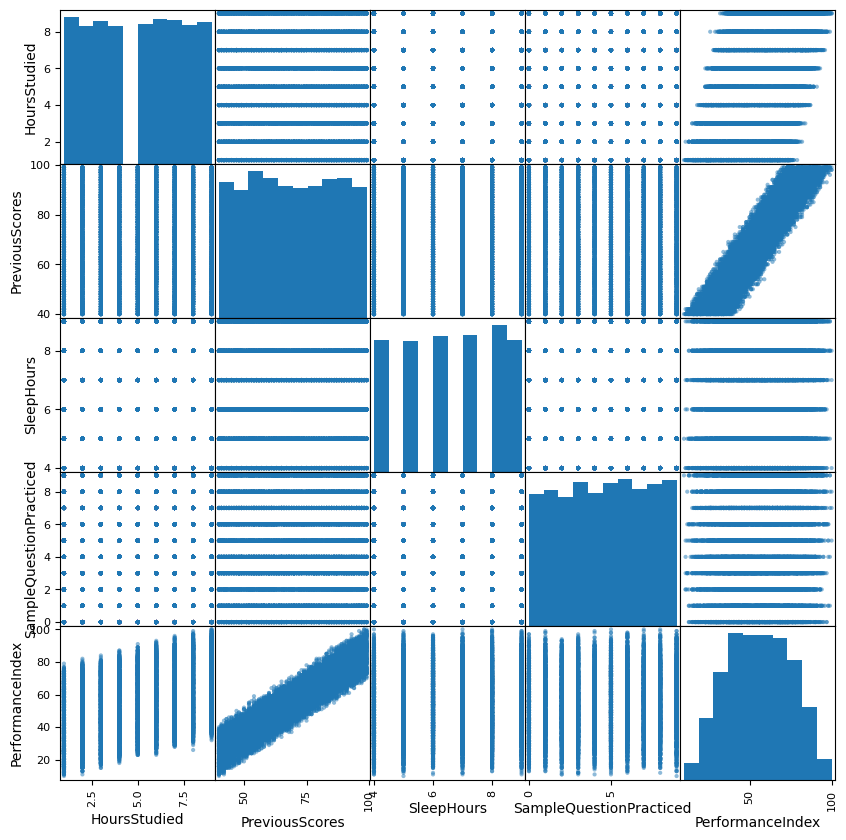

In [10]:
# scatter matrix

scatter_matrix(data, figsize=(10, 10))
plt.show()


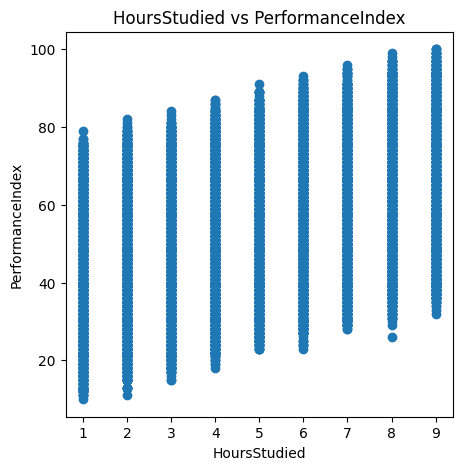

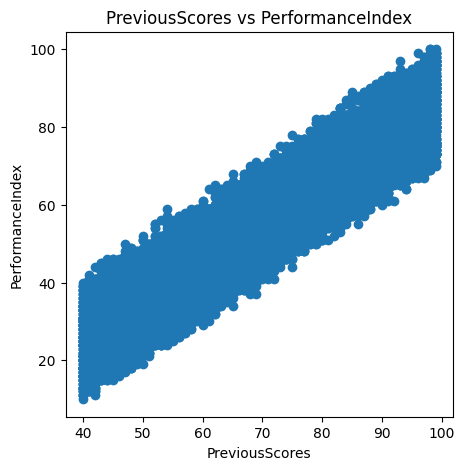

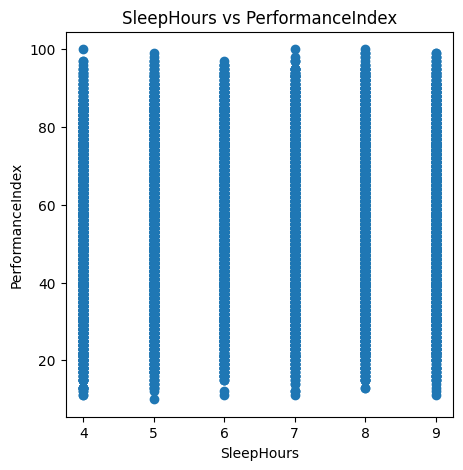

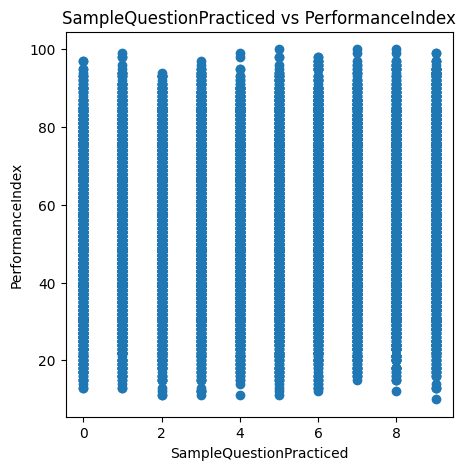

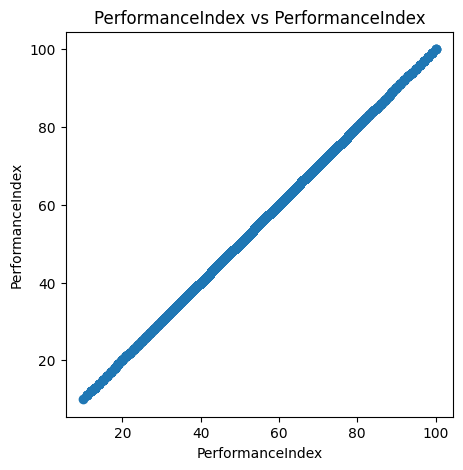

In [11]:
# graph all of the variables in scatter plots vs the target variable Performance Index
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'{col} vs PerformanceIndex')
    ax.scatter(data[col], data['PerformanceIndex'])
    ax.set_xlabel(col)
    ax.set_ylabel('PerformanceIndex')
    plt.show()
    plt.close(fig)

# **Preprocessing Operations :**

In [12]:
data

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPracticed,PerformanceIndex
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [13]:
# encode the categorical variable Extracurricular Activities using LabelEncoder
le = LabelEncoder()
data['ExtracurricularActivities'] = le.fit_transform(data['ExtracurricularActivities'])


In [14]:
data

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPracticed,PerformanceIndex
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


# **Splitting data into features and target :**

Features, also known as independent variables or predictors, are the input variables used to make predictions. They represent the attributes or characteristics of the data. The target, also known as the dependent variable or response, is the output variable that the model aims to predict. This separation allows the model to learn the relationship between the input features and the target variable. For example, in a dataset predicting house prices, features might include the number of bedrooms, square footage, and location, while the target would be the house price. Properly splitting the data ensures that the model can be trained effectively and evaluated accurately.

In [15]:
X = data.drop("PerformanceIndex", axis=1)
Y = data["PerformanceIndex"]

In [16]:
X

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPracticed
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [17]:
Y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: PerformanceIndex, Length: 10000, dtype: int64

## **On The Linear regression Model :**

## Many Ways To Skin A Cat

There are multiple libraries that can be used for linear regression. Even within the same library there can be several ways to accomplish the same thing.

# The "R" Way

Using a formula, you define the target and independent variables like this:

target ~ var1 + var2 + C(var3) + var4

Where C() indicates a categorical variable. Because we defined it as a categorical, we dont have to make dummy variables or anything fancy.

In [18]:
#use statsmodels to fit a linear regression model to the data, ensure that the predictor Extracurricular Activities is categorical
model = smf.ols('PerformanceIndex ~ C(ExtracurricularActivities) + HoursStudied + PreviousScores + SleepHours + SampleQuestionPracticed', data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       PerformanceIndex   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:42:39   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

# What are we looking for/at?

## Are ANY of our variables good at prediction
F-statistic = 175,700 is much higher than 1, so yes

## How good is our model
R-squared = .989 is almost 1, the highest score, so this is incredible

## Which predictors are significant
All of our predictors have a "high T, low P" which means they all are important in predicting the target

# How to do the same thing, differently

While the R style formula is flexible, it has it's own limitations and there are other ways to do the same analysis.

This one will look at using a sm.OLS call in which we convert categorical variables to dummy variables.

In [20]:
data2 = pd.read_csv("../data/Student_Performance.csv")

#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
data2['ExtracurricularActivities'] = label_encoder.fit_transform(data2['ExtracurricularActivities'])
data2

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPracticed,PerformanceIndex
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [21]:
# # Define independent variables (X) and dependent variable (y)
X2 = data2[['ExtracurricularActivities','HoursStudied','PreviousScores','SleepHours','SampleQuestionPracticed']]
X2 = sm.add_constant(X)  # Add intercept term
Y2 = data2['PerformanceIndex']

In [22]:
# Fit OLS model
model2 = sm.OLS(Y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       PerformanceIndex   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:44:11   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# **Using polynomial Regression :**

Adding polynomial terms to a regression model involves including higher-order terms of the predictor variables, such as squares or cubes, to capture non-linear relationships between the predictors and the target variable. This technique allows the model to fit more complex patterns in the data that a simple linear model might miss. For example, including a squared term (e.g., x^2) can help model quadratic relationships. By adding polynomial terms, the flexibility of the regression model increases, potentially improving its predictive performance. However, it's important to balance this with the risk of overfitting, where the model becomes too complex and captures noise rather than the underlying trend.

Lets add a polynomial term to the model, in this case HoursStudied^2

In [27]:
# add a polynomial term to the model, lets do HoursStudied^2
data2['HoursStudied^2'] = data2['HoursStudied']**2
data2

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPracticed,PerformanceIndex,HoursStudied^2,PreviousScores^3
0,7,99,1,9,1,91,49,970299
1,4,82,0,4,2,65,16,551368
2,8,51,1,7,2,45,64,132651
3,5,52,1,5,2,36,25,140608
4,7,75,0,8,5,66,49,421875
...,...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23,1,117649
9996,7,64,1,8,5,58,49,262144
9997,6,83,1,8,5,74,36,571787
9998,9,97,1,7,0,95,81,912673


In [25]:
#rerun the model with the new polynomial term
X3 = data2[['ExtracurricularActivities','HoursStudied','HoursStudied^2','PreviousScores','SleepHours','SampleQuestionPracticed']]
X3 = sm.add_constant(X3)  # Add intercept term
Y3 = data2['PerformanceIndex']

# Fit OLS model
model3 = sm.OLS(Y3, X3)
results3 = model3.fit()
print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:       PerformanceIndex   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.464e+05
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:45:34   Log-Likelihood:                -21306.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9993   BIC:                         4.268e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## No improvement

Adding HoursStudied squared did not improve our model, and the new predictor has "low T, high P" so it's not even useful. Let's try Previous Score


In [28]:
#redo the same process but for PreviousScores^2
data2['PreviousScores^3'] = data2['PreviousScores']**3

X4 = data2[['ExtracurricularActivities','HoursStudied','PreviousScores','PreviousScores^3','SleepHours','SampleQuestionPracticed']]
X4 = sm.add_constant(X4)  # Add intercept term
Y4 = data2['PerformanceIndex']

# Fit OLS model
model4 = sm.OLS(Y4, X4)
results4 = model4.fit()
print(results4.summary())


                            OLS Regression Results                            
Dep. Variable:       PerformanceIndex   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.464e+05
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:51:29   Log-Likelihood:                -21306.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9993   BIC:                         4.268e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## No Help

Once again our polynomial term is not significant and not helpful. You would NOT use one in this dataset

# Forward selection

Forward selection is a stepwise regression technique used to build a linear regression model by adding predictor variables one at a time. The process begins with an empty model and iteratively adds the most significant variable at each step. Here's how it works:

1. **Start with No Predictors**: Begin with an empty model that includes only the intercept.
2. **Add Predictors**: Evaluate all potential predictor variables not yet included in the model. Add the predictor that improves the model the most, typically based on a criterion like the lowest p-value or highest R-squared.
3. **Repeat**: Continue adding predictors one at a time, each time selecting the variable that provides the most significant improvement to the model.
4. **Stop**: The process stops when adding more predictors does not significantly improve the model, based on a pre-defined stopping rule (e.g., a p-value threshold or adjusted R-squared).

Forward selection helps in identifying a subset of predictor variables that contribute most to the model, improving interpretability and potentially reducing overfitting.

In [29]:
#using the dataframe data, use forwad selection to select the best model
# ** I used CoPilot to generate this entire function **
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('best_candidate:',best_candidate)
        print('best_new_score:',best_new_score)
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model


In [30]:
#show the order of the variables selected
model = forward_selected(data, 'PerformanceIndex')
print(model.model.formula)
print(model.rsquared_adj)


best_candidate: PreviousScores
best_new_score: 0.8375549180859975
best_candidate: HoursStudied
best_new_score: 0.9858695978751709
best_candidate: SleepHours
best_new_score: 0.9876460657670513
best_candidate: SampleQuestionPracticed
best_new_score: 0.9884935186244026
best_candidate: ExtracurricularActivities
best_new_score: 0.9887467051679587
PerformanceIndex ~ PreviousScores + HoursStudied + SleepHours + SampleQuestionPracticed + ExtracurricularActivities + 1
0.9887467051679587


# Backward selection 

Backward selection is a stepwise regression technique used to build a linear regression model by removing predictor variables one at a time. The process begins with a model that includes all potential predictors and iteratively removes the least significant variable at each step. Here's how it works:

1. **Start with All Predictors**: Begin with a full model that includes all potential predictor variables.
2. **Remove Predictors**: Evaluate all predictor variables in the model and remove the one that is the least significant, typically based on the highest p-value.
3. **Repeat**: Continue removing predictors one at a time, each time selecting the variable that is the least significant and removing it from the model.
4. **Stop**: The process stops when removing more predictors does not significantly improve the model, based on a pre-defined stopping rule (e.g., a p-value threshold or adjusted R-squared).

Backward selection helps in identifying a subset of predictor variables that contribute most to the model, improving interpretability and potentially reducing overfitting.

In [33]:
#repeat the same exercise but with backwards selection
def backward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = list(remaining)
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            print('formula:',formula)
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('worst_candidate:',best_candidate)
        print('new_score:',best_new_score)
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.remove(best_candidate)
            current_score = best_new_score
        else:
            print('current score lower, quitting', current_score, ' ', best_new_score)
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model


In [34]:
#execute the backwards selection on the data
model2 = backward_selected(data, 'PerformanceIndex')
print(model2.model.formula)
print(model2.rsquared_adj)


formula: PerformanceIndex ~ PreviousScores + HoursStudied + SleepHours + SampleQuestionPracticed + ExtracurricularActivities + PreviousScores + 1
formula: PerformanceIndex ~ PreviousScores + HoursStudied + SleepHours + SampleQuestionPracticed + ExtracurricularActivities + HoursStudied + 1
formula: PerformanceIndex ~ PreviousScores + HoursStudied + SleepHours + SampleQuestionPracticed + ExtracurricularActivities + SleepHours + 1
formula: PerformanceIndex ~ PreviousScores + HoursStudied + SleepHours + SampleQuestionPracticed + ExtracurricularActivities + SampleQuestionPracticed + 1
formula: PerformanceIndex ~ PreviousScores + HoursStudied + SleepHours + SampleQuestionPracticed + ExtracurricularActivities + ExtracurricularActivities + 1
worst_candidate: SleepHours
new_score: 0.9887467051679587
formula: PerformanceIndex ~ PreviousScores + HoursStudied + SampleQuestionPracticed + ExtracurricularActivities + PreviousScores + 1
formula: PerformanceIndex ~ PreviousScores + HoursStudied + Sampl